In [1]:
import numpy as np
from pylab import *

# Homework 1: Dust Models for the ISM
In this assignment, we're going to create dust models for the bulk interstellar medium. 
Over the course of this assignment, we'll build up our dust model in terms of:
1. the size distribution: most generally defined in terms of the number of particles of size $a$ per size bin $da$ distributed between the minimum dust size, $a_{min}$ and the maximum dust size $a_{max}$ in a power-law of the form: $n(a) \propto a^{-p} da$

2. the properties of the dust grains: determined by the composition and assumed physical structure of the dust (ranging from perfect sphere to fluffy aggregate) which determines the optical properties and material density of grains 

As you work through the parts of each question, you can write the code in the cell underneath each part and any written responses can be added in corresponding markdown cells (like this one). For this first assignment, I have provided some scaffolding on the coding end meant to get you started and demonstrate some ways you can go about formatting your solutions. You are welcome to amend any of the provided code or not use any of it at all, as long as your solutions address each question in full. 

## I. Size Distribution
### part a. 
Write a python function to calculate a normalized distribution of dust sizes $n(a) da$ for a given input dust size $a$ given $a_{min}$, $a_{max}$, $p$ and total number density of dust $n_{d}$ across all sizes.

Recall that: 

$n_d = \int_{a_{min}}^{a_{max}} n_0 (a/a_{min})^{-p} da$

Using your function, calculate $n(a)da$ vs. $a$ for a set of fiducial ISM values:

$a_{min} = 0.005 \mu m, \\
a_{max} = 1 \mu m, \\
p=3.5$

assuming a total number density $n_d = 1 cm^{-3}$, where $a$ should be an array of sizes from $a_{min}$ to $a_{max}$. 
Check your function by taking a numerical integral of the ism distribution you calculated using some form of numerical integration like `numpy.trapz`. The value of your numerical integral over the array of size bins should approximately equal $n_d$. How does the error in this integral depend on the number of points in your $a$ array? Is it better or worse if $a$ is logarithmically or linearly spaced?




In [2]:
# calculate n_ism for ISM parameters
amin = 0.005
amax = 1
p = 3.5
n_d = 1


'''
- For this part, it would be more concise to use a for loop instead of repeating code while only changing n_bins value
- I also didnt include the error
'''

# size bins from amin to amax
#n_bins = 200 #number of bins in a_bins
# a_bins = #array of sizes to compute n(a)da over
#a_bins = np.linspace(amin,amax,n_bins)
#a_logs = np.logspace(amin,amax,n_bins)
#n_ism = n_(a_bins,amin,amax,p,n_d)
#n_ismLog = n_(a_logs,amin,amax,p,n_d)
#nd_num =  #numerical integral over n(a)da
#nd_num = np.trapz(n_ism,a_bins)
#nd_numLog = np.trapz(n_ismLog,a_logs)

'''
- one of my errors here was not doing the analytical solution to this integral to get the prefactor
- second mistake was not making sure that only physical values would be returned
'''

#def n_(a_bins,amin=0.005,amax=1,p=3.5,n_d=10):
#    """ function to return a normalized size distribution across a set of bins,
#    a_bins: an array of sizes from amin to amax 
#    with given
#    amin: minimum a 
#    amax: maximum a 
#    p: power-law index
#    n_d: total number density """
#    # your function here
#    y = ( a_bins / amin ) ** -p
#    y /= np.trapz(y, a_bins)
#    return  n_d * y

def n_(a_bins,amin=0.005,amax=1,p=3.5,n_d=10):
    """ function to return a normalized size distribution across a set of bins,
    a_bins: an array of sizes from amin to amax 
    with given
    amin: minimum a 
    amax: maximum a 
    p: power-law index
    n_d: total number density """
    # your function here
    y = (amin**p) * (amax**(-p+1) - amin**(-p+1)) / (-p+1)
    n_0 = n_d / y
    if n_0 < 0:
        print('Sorry, not real')
        return 0
    else:
        return n_0 * (a_bins/amin)**(-p)
    
# size bins from amin to amax
for n_bins in [20,100,200]:
    a_bins = np.linspace(amin,amax,n_bins)
    a_binsLog = np.logspace(np.log10(amin),np.log10(amax),n_bins)
    
    # n_ism = n(a) da computed for ISM parameters
    n_ism = n_(a_bins,amin,amax,p,n_d)
    n_ismLog = n_(a_binsLog,amin,amax,p,n_d)
    
    #nd_num = #numerical integral over n(a)da
    nd_num = np.trapz(n_ism,a_bins)
    nd_numLog = np.trapz(n_ismLog,a_binsLog)
    
    error = n_d/nd_num -1
    errorLog = n_d/nd_numLog -1
    print('bins: {}, linear bins error: {}, log bins error: {}'.format(n_bins,error,errorLog))

bins: 20, linear bins error: -0.9236525818210726, log bins error: -0.09307548559902423
bins: 100, linear bins error: -0.6222644473950809, log bins error: -0.003745959452650993
bins: 200, linear bins error: -0.36177097639569367, log bins error: -0.0009295804991692469


# (answer)

Too many points or too few points increases the error. Between linearly and logarithmically spaced bins, they are approximately the same, unless n_bins is increased to a large number, in which case logarithmically is better. (assuming no other factors change)

Correction: error gets smaller with greater amount of points, but with log bins, the error drastically decreases.

### part b. 
Once you're happy with how things are looking in the above parts, write another function to use what you have so far to calculate the average size of a dust particle $<a>$ for some size distribution $n(a) da$ and use it calculate the mean size of the distribution in part a. 



$<a> = \frac{\int_{a_{min}}^{a_{max}}an(a)da}{\int_{a_{min}}^{a_{max}}n(a)da}$

In [3]:
# b). function to return mean size for a given size distribution
'''
- I calculated total a, but didn't calculate total n. I then return only total a instead of
dividing by total n 
'''

#def mean_a(a_bins, n_dist):
#    """ function return the mean size of grains in given distribution 
#    a_bins: array of sizes to compute over
#    n_dist: n(a) da computed over a_bins """
#    # your function here
#    #y = np.trapz(a_bins * n_dist, a_bins)
#    y = a_bins * n_dist
#    return np.trapz(y, a_bins)

def mean_a(a_bins, n_dist):
    """ function return the mean size of grains in given distribution 
    a_bins: array of sizes to compute over
    n_dist: n(a) da computed over a_bins """
    # your function here
    #y = np.trapz(a_bins * n_dist, a_bins)
    a = np.trapz(n_dist*a_bins,a_bins)
    n = np.trapz(n_dist,a_bins)
    return a/n

a_bysize_ism = mean_a(a_binsLog,n_ismLog) # mean-size for computed ISM values
print(a_bysize_ism)

0.008326960152533494


### c.
Now calculate the mean mass of a particle for the same distribution, assuming that each dust particle is a sphere with radius $a$ and a material density of $\rho_s = 3.3 \mathrm{ \ g \ cm^{-3}}$. How does this compare to the mass of a hydrogen atom? What is the typical size of the average mass particle? 



$<m> = \frac{\int_{a_{min}}^{a_{max}}\rho_s \frac{4\pi}{3} a^3 n(a) da}{\int_{a_{min}}^{a_{max}} n(a) da}$

In [4]:
# c). mass distribution
rho_s = 3.3 # material density of grains in g/cm^3
'''
- Same thing here, I didn't calculate total n
- didn't convert rho to microns
'''

#def mean_m(a_bins,n_dist, rho_s = 3.3):
#    """ function to calculate the mean mass of a particle given 
#    a_bins: array of sizes
#    n_dist: n(a)da computed over array of sizes
#    rho_s: material density of grains
#    """
#    # your function here
#    volume_constant = rho_s * 4 * np.pi / 3
#    avg_mass = np.trapz(volume_constant * a_bins**3 * n_dist, a_bins)
#    return avg_mass

def mean_m(a_bins,n_dist, rho_s = 3.3):
    """ function to calculate the mean mass of a particle given 
    a_bins: array of sizes
    n_dist: n(a)da computed over array of sizes
    rho_s: material density of grains
    """
    # your function here
    rho_s *= (1e-4**3)
    volume_constant = rho_s * 4 * np.pi / 3
    m = np.trapz(volume_constant * a_bins**3 * n_dist, a_bins)
    n = np.trapz(n_dist,a_bins)
    return m/n

m_ave_ism = mean_m(a_binsLog,n_ismLog)
mH = 1.67e-24 # mass of a hydrogen atom in grams

print( r'{:.2e} g or {:.2e} hydrogen atoms'.format(m_ave_ism, m_ave_ism/mH))

# a_bymass_ism = # average size of the average mass grain 
a_bymass_ism = (mean_m(a_binsLog,n_ismLog)/(3.3)/(4*np.pi/3))**(1/3) * 1e4
print(a_bymass_ism)

1.13e-16 g or 6.79e+07 hydrogen atoms
0.020170687011614584


# part c answer:

We can see that dust is millions of times heavier than a hydrogen atom. We also see that the typical size of a mass particle is about 0.02 microns

### d. 
So far, mathematically, we've essentially been treating the size distribution as a kind of probabibility density function. This means we can use a cumulative sum function to calculate the cumulative distribution function (CDF) from $a_{min}$ to $a_{max}$ of the cumulative number density distribution and the cumulative mass distribution. Make a plot of the cumulative fraction at each size by number ($F_{N}(<a)$) and by mass ($F_{M}(<a)$), annotating the sizes you calculated in part c and d on the plot. 

Recall: A CDF is normalized such that it goes from 0 to 1 across the range of its variable.

Based on the ISM distribution, are most of the particles at smaller or larger sizes? Is most of the mass in particles at smaller or larger sizes?

Text(0.5, 1.0, 'CDF for ISM-like dust size distribution')

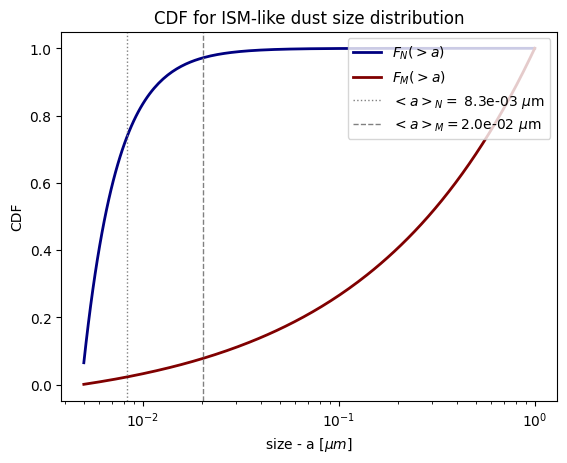

In [5]:
'''
- did not include da, which was already completed.
- didn't convert to microns in my volume constant
- didn't multiply by da for CDF_M and CDF_M
- rest of the code was on the right path
'''

#da = np.gradient(a_bins)
#vol_constant = (4/3) * np.pi * rho_s * a_bins**3
#CDF_N = #cumulative distribution function by number
#CDF_N = np.cumsum(n_ism) / np.sum(n_ism)
#CDF_M = #cumulative distribution function by mass
#CDF_M = np.cumsum(vol_constant * n_ism) / np.sum((vol_constant * n_ism))

da = np.gradient(a_binsLog)
vol_constant = (4/3) * np.pi * (rho_s * (1e-4**3)) * a_binsLog**3

#CDF_N = #cumulative distribution function by number
CDF_N = np.cumsum(n_ismLog*da) / np.sum(n_ismLog*da)

#CDF_M = #cumulative distribution function by mass
CDF_M = np.cumsum(vol_constant*n_ismLog*da) / np.sum((vol_constant * n_ismLog*da))

f,ax=subplots(1,dpi=100)
ax.plot(a_binsLog, CDF_N,lw=2,label=r'$F_N(>a)$',color='navy')
ax.plot(a_binsLog, CDF_M,lw=2,label=r'$F_M(>a)$',color='maroon')
ax.set_xscale('log')
ax.axvline(a_bysize_ism,ls='dotted',color='gray',lw=1,label=r'$<a>_N =$ {:.1e} $\mu$m'.format(a_bysize_ism))
ax.axvline(a_bymass_ism,ls='dashed',color='gray',lw=1,label=r'$<a>_M =${:.1e} $\mu$m'.format(a_bymass_ism))
ax.set_xlabel(r'size - a [$\mu m$]')
ax.set_ylabel(r'CDF')
ax.legend(loc=1)
ax.set_title('CDF for ISM-like dust size distribution')

## II. Optical Properties
Here we'll be using an open source code package called [optool](https://github.com/cdominik/optool/blob/master/UserGuide.pdf) to calculate the dust opacities of our dust grains using Mie Theory. *Note that if you are not using this notebook on the binder hub at CCA, you will need to install optool on our own machine using the installation instructions in the User Guide in order to run this part*

### part a.
We'll start by using `optool`'s python interface to initialize a particle object with an astrosilicate composition for a calculation with the default optical properties using Mie Theory for an ism-like distribution. We'll print the average size attribute of the optool particle object. It should match your answer for part Ib above. 

The information about dust model that `optool` can take as input are detailed in Section 4 of the linked manual. 
The output information that `optool` calculates is stored as attributes of the particle object, described in Section 7 of the manual. 

We are going to take the extinction opacity from the dust model and compare its shape to the measured average Milky Way extinction curve between 0.1 and 2.2 microns. 

For what wavelengths does this simple model capture the shape and behavior of the interstellar extinction curve the best?

....................
....................
Writing dust opacity output to file:  /tmp/optool_ul63ujbc/dustkappa.dat


Reading /tmp/optool_ul63ujbc/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_ul63ujbc
[0.0083084]


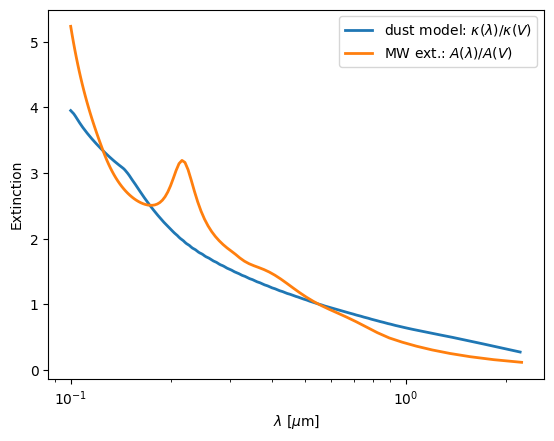

In [8]:
import optool
from astropy.io import fits

amin = 0.005
amax = 1
p = 3.5

#define the input command for optool
cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p)

#run optool with the input command in the python interface
pism = optool.particle(cmd)

#access the average size attribute for the input size distribution
print(pism.a1)

#wavelength and extinction opacities for the calculation
wav_model = pism.lam # wavelength in microns
kext_model = pism.kext.squeeze() # kappa_ext in g/cm^2

#normalization factor so that kext = 1 at V band 
k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
kext_model /= k_norm

#load in milky way extinction curve 
hdu1 = fits.open('milkyway_diffuse_001(1).fits')[1]
wav_mw = 1./hdu1.data['WAVELENGTH'] #wavelength in microns
Aext_mw = hdu1.data['Av/E(B-V)']/3.1 #A(wav)/A(V)

#plot the model and the mw extinction curve
f,ax = subplots(1,dpi=100)
ax.plot(wav_model, kext_model,lw=2,label='dust model: $\kappa(\lambda)/\kappa(V)$')
ax.plot(wav_mw, Aext_mw,lw=2, label='MW ext.: $A(\lambda)/A(V)$')
ax.set_xlabel(r'$\lambda$ [$\mu$m]')
ax.set_xscale('log')
ax.set_ylabel('Extinction')
ax.legend()

# (answer)
It seems to capture the behavior and enxtinction curve decently around 0.5 to 1 microns

### correction: 
Answered this badly somehow. Our model didn't show something happening at like 0.8 $\lambda$ but the astrocilicate model we used did.

### part b.

You'll notice that several features in the measured extinction curve are notably absent from the model. Using the procedure above for calculating model extinctions using `optool`, conduct a numerical experiment varying one variable at a time and generate different dust models to investigate how the features in the model extinction curve change for different values of:

i) $a_{max}$

ii) power-law index $p$

iii) grain material compositions (you may want to add grain materials to the astrosilicate mix rather than changing the entire composition)

the exact values you test are up to you, but bonus points for motivating your choices. Cite any references you use.

Make a figure like the one in part IIa to show the results for the different dust models you test against the observed extinction and describe the behavior of the models with the different parameters. Based on your results, what kind of changes would allow the dust model to better capture the behavior/features in the interstellar extinction curve and why?


....................
....................
Writing dust opacity output to file:  /tmp/optool_r_68k88l/dustkappa.dat
....................


Reading /tmp/optool_r_68k88l/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_r_68k88l


....................
Writing dust opacity output to file:  /tmp/optool_67g4hk92/dustkappa.dat


Reading /tmp/optool_67g4hk92/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_67g4hk92


....................
...................
Writing dust opacity output to file:  /tmp/optool_3bxhk3pp/dustkappa.dat


Reading /tmp/optool_3bxhk3pp/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_3bxhk3pp


....................
....................
Writing dust opacity output to file:  /tmp/optool_8q2cuzf_/dustkappa.dat


Reading /tmp/optool_8q2cuzf_/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_8q2cuzf_


....................
....................
Writing dust opacity output to file:  /tmp/optool_e90uiocx/dustkappa.dat
....................


Reading /tmp/optool_e90uiocx/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_e90uiocx


....................
Writing dust opacity output to file:  /tmp/optool_32sn2cae/dustkappa.dat


Reading /tmp/optool_32sn2cae/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_32sn2cae


....................
....................
Writing dust opacity output to file:  /tmp/optool_soe90r60/dustkappa.dat


Reading /tmp/optool_soe90r60/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_soe90r60


....................
....................
Writing dust opacity output to file:  /tmp/optool_z_u7mmja/dustkappa.dat


Reading /tmp/optool_z_u7mmja/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_z_u7mmja


....................
..................

Reading /tmp/optool_lz5b9uu8/dustkappa.dat ...
Cleaning up temporary directory /tmp/optool_lz5b9uu8


..
Writing dust opacity output to file:  /tmp/optool_lz5b9uu8/dustkappa.dat


Text(0.5, 1.0, 'composition')

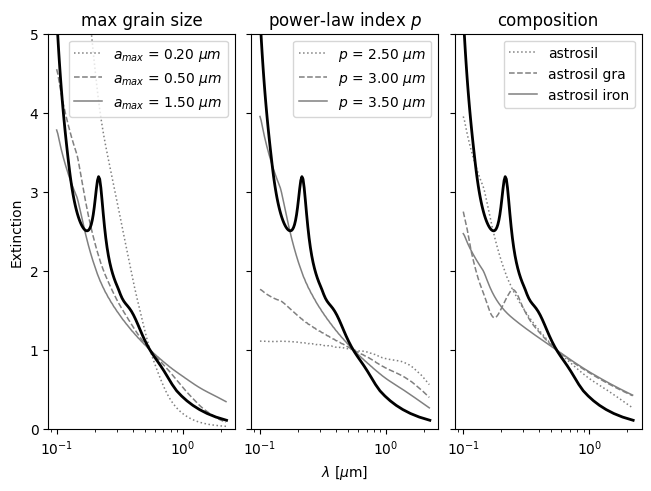

In [16]:
'''
- Using a for loop to test various values for each of the three thing that could be changed, would have been a better idea, compared to just changing
one variable for each thing, meaning I would have only tested one value per changeable item.
- made some not so great choices for various values, and didn't end up including different materials into the process.
'''

f,row=subplots(1,3,constrained_layout=True,dpi=100,sharey=True,sharex=True)

#fiducial values
amin = 0.005
amax = 1
#amax_change = 20 not necessary
p = 3.5
#p_change = 2.5 not necessary

#cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p)
#cmd_amax = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax_change, p = p)
#cmd_p = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p_change)
#cmd_grain = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax= amax, p = p)

#pism = optool.particle(cmd)
#pism_amax = optool.particle(cmd_amax)
#pism_p = optool.particle(cmd_p)
#pism_grain = optool.particle(cmd_grain)

#print(pism.a1)
#print(pism_amax.a1)
#print(pism_p.a1)
#print(pism_grain.a1)

#wav_model= pism.lam
#wav_model_amax = pism_amax.lam 
#wav_model_p = pism_p.lam 
#kext_model = pism.kext.squeeze()
#kext_model_amax = pism_amax.kext.squeeze() 
#kext_model_p = pism_p.kext.squeeze() 

#k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
#k_norm_amax = kext_model_amax[np.argmin(np.abs(wav_model-0.551))]
#k_norm_p = kext_model_p[np.argmin(np.abs(wav_model-0.551))]
#kext_model /= k_norm
#kext_model_amax /= k_norm_amax
#kext_model_p /= k_norm_p


#for ax in row:
#    ax.plot(wav_mw, Aext_mw,lw=2,color='black',label='MW ext.')
#    ax.set_xscale('log')
#    ax.set_xlabel(r'$\lambda$ [$\mu$m]')

#row[0].plot(wav_model,kext_model,lw=2,color='red',label='dust model')
#row[1].plot(wav_model_amax,kext_model_amax,lw=2,color='blue',label='amax changed')
#row[2].plot(wav_model_p,kext_model_p,lw=2,color='green',label='power law index changed')

# for grain sizes
sca(row[0])
for amax, ls in zip([0.2,0.5,1.5],['dotted','dashed','solid']):
    cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax=amax, p=p)
    
    pm = optool.particle(cmd)
    
    wav_model = pm.lam
    kext_model = pm.kext.squeeze()
    
    k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
    kext_model /= k_norm
    
    plot(wav_model, kext_model, lw=1.1, ls=ls,label=r'$a_{max}$'+r' = {:.2f} $\mu m$'.format(amax),color='gray')
legend()
plot(wav_mw, Aext_mw, lw=2,color='black')
xscale('log')
ylabel('Extinction')
title('max grain size')


amin = 0.005
amax = 1
p = 3.5

# for power law
sca(row[1])
for p, ls in zip([2.5, 3.0, 3.5], ['dotted','dashed','solid']):
    cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material='astrosil', amin=amin, amax=amax, p=p)
    
    pm = optool.particle(cmd)
    
    wav_model = pm.lam
    kext_model = pm.kext.squeeze()
    
    k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
    kext_model /= k_norm
    
    plot(wav_model, kext_model, lw=1.1, ls=ls,label=r'$p$ = {:.2f} $\mu m$'.format(p),color='gray')
plot(wav_mw, Aext_mw,lw=2,color='black')
legend()
xscale('log')
ylim(0,5)
xlabel(r'$\lambda$ [$\mu$m]')
title(r'power-law index $p$')


amin = 0.005
amax = 1
p = 3.5

sca(row[2])
for material,ls in zip(['astrosil', 'astrosil gra', 'astrosil iron'],['dotted','dashed','solid']):
    cmd = "optool {material} -mie -l 0.1 2.2 -a {amin} {amax} {p} 100 ".format(material=material, amin=amin, amax=amax, p=p)
    
    pm = optool.particle(cmd)
    
    wav_model = pm.lam
    kext_model = pm.kext.squeeze()
    
    k_norm = kext_model[np.argmin(np.abs(wav_model-0.551))]
    kext_model /= k_norm
    
    plot(wav_model, kext_model, lw=1.1, ls=ls,label=material,color='gray')
plot(wav_mw, Aext_mw,lw=2,color='black')
legend()
xscale('log')
title('composition')

# 